Salary Prediction model (Machine Learning model)

Here we are going to load out the dependencies and the required datasets

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("survey_results_public.csv")
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


Now we are going to put only those thing which are required by us

In [16]:
df = df[["Country", "EdLevel", "YearsCodePro","Employment", "ConvertedComp"]]
df = df.rename({ "ConvertedComp": "Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN


In [17]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0
11,Spain,Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34756 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34756 non-null  object 
 1   EdLevel       34188 non-null  object 
 2   YearsCodePro  34621 non-null  object 
 3   Employment    34717 non-null  object 
 4   Salary        34756 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.6+ MB


In [19]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [22]:
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34025 entries, 7 to 64154
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34025 non-null  object 
 1   EdLevel       34025 non-null  object 
 2   YearsCodePro  34025 non-null  object 
 3   Salary        34025 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.3+ MB


In [23]:
df['Country'].value_counts()

United States        8082
India                2563
United Kingdom       2551
Germany              2206
Canada               1293
                     ... 
Brunei Darussalam       1
Guinea                  1
Burkina Faso            1
Malawi                  1
Yemen                   1
Name: Country, Length: 159, dtype: int64

In [24]:
def Shorten_Categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i]>=cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [25]:
country_map = Shorten_Categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Other                 10174
United States          8082
India                  2563
United Kingdom         2551
Germany                2206
Canada                 1293
Brazil                 1139
France                 1103
Netherlands             798
Poland                  789
Australia               755
Spain                   744
Italy                   660
Russian Federation      595
Sweden                  573
Name: Country, dtype: int64

Let's have some of the graph

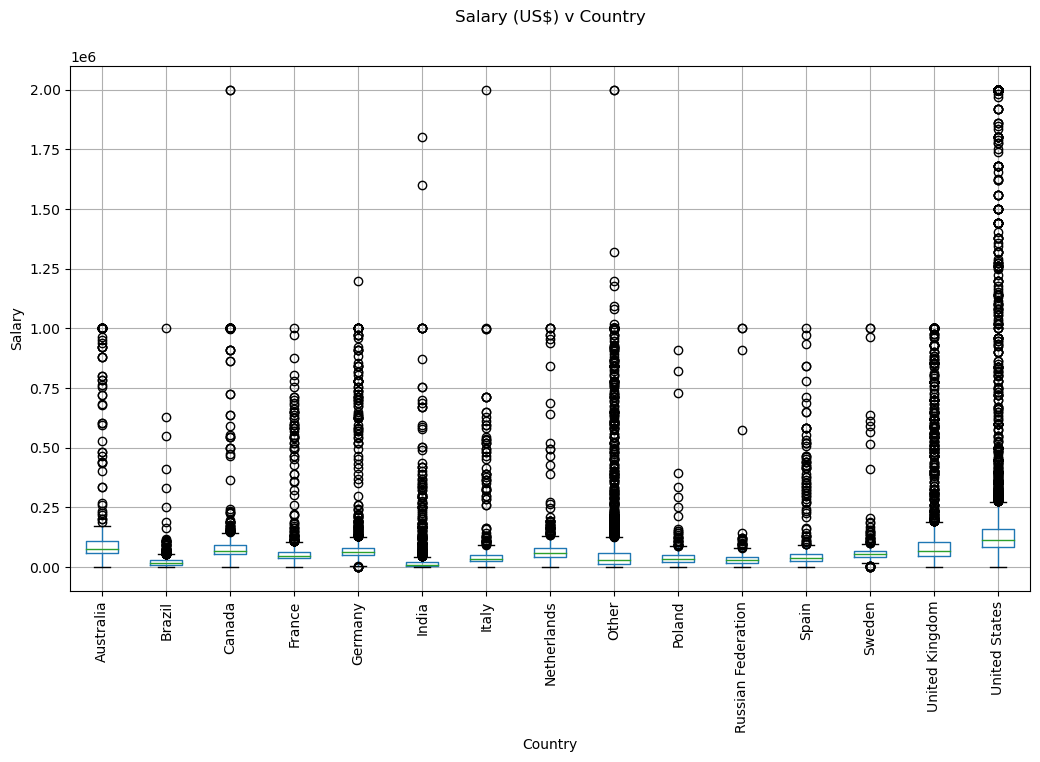

In [26]:
fig, ax = plt.subplots(1,1,figsize = (12,7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation = 90)
plt.show()

In [28]:
df = df[df["Salary"]<= 250000]
df = df[df["Salary"]>= 10000]
df = df[df["Country"] != 'Others']

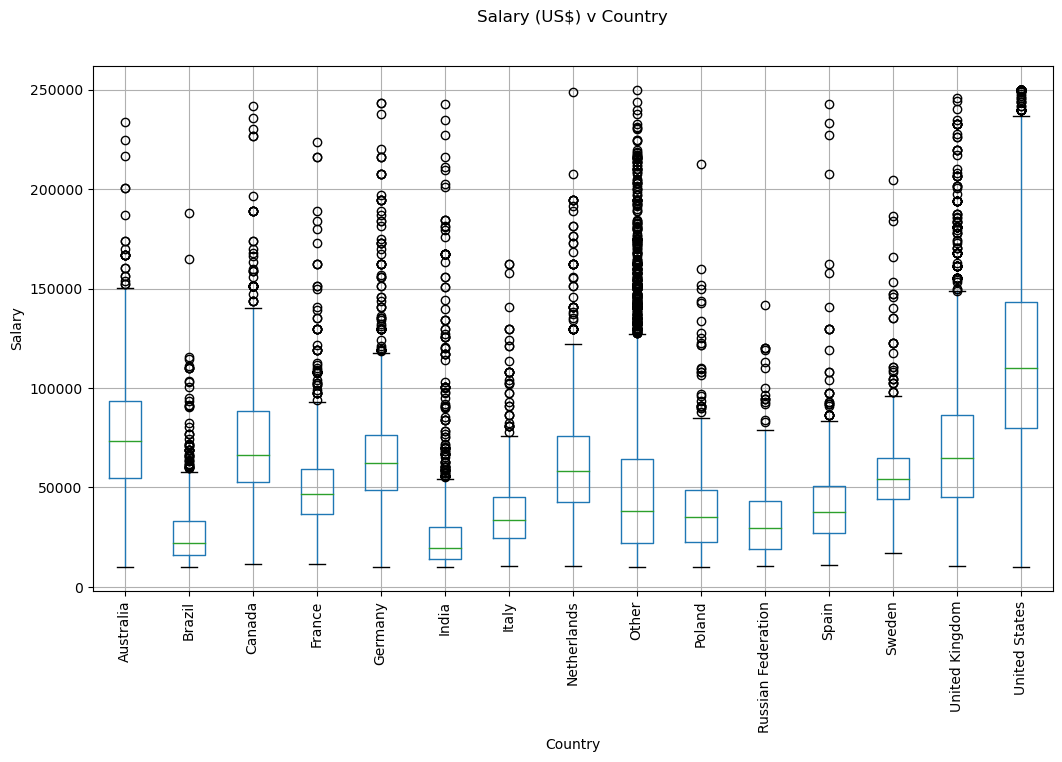

In [29]:
fig, ax = plt.subplots(1,1,figsize = (12,7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation = 90)
plt.show()

In [30]:
df["YearsCodePro"].unique()

array(['13', '4', '2', '7', '20', '1', '23', '3', '10', '14', '12', '29',
       '6', '28', '8', '15', '11', '25', '5', '9', 'Less than 1 year',
       '21', '16', '35', '18', '24', '32', '19', '22', '38', '30', '26',
       '17', '27', 'More than 50 years', '40', '34', '33', '36', '39',
       '37', '31', '41', '45', '50', '42', '43', '44', '48', '46', '49',
       '47'], dtype=object)

In [31]:
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    if x =='Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [32]:
df["YearsCodePro"].unique()

array([13. ,  4. ,  2. ,  7. , 20. ,  1. , 23. ,  3. , 10. , 14. , 12. ,
       29. ,  6. , 28. ,  8. , 15. , 11. , 25. ,  5. ,  9. ,  0.5, 21. ,
       16. , 35. , 18. , 24. , 32. , 19. , 22. , 38. , 30. , 26. , 17. ,
       27. , 50. , 40. , 34. , 33. , 36. , 39. , 37. , 31. , 41. , 45. ,
       42. , 43. , 44. , 48. , 46. , 49. , 47. ])

In [33]:
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school',
       'I never completed any formal education'], dtype=object)

In [34]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if  'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)


In [35]:
df['EdLevel'].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

For strings type values we need Label encoder

In [36]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df['EdLevel'].unique()


array([0, 2, 1, 3])

In [37]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df['Country'].unique()

array([14, 13, 11,  7,  4,  2,  8,  6,  1,  3, 12,  5,  9,  0, 10])

In [38]:
X = df.drop("Salary", axis =1)
y = df["Salary"]

Using the Linear Regression model

In [39]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [40]:
y_pred = linear_reg.predict(X)

In [42]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
error = np.sqrt(mean_squared_error(y,y_pred))

In [43]:
error

39936.09790008393

Using the Decision tree model

In [44]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor(random_state=0)
dec_tree.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [45]:
y_pred = dec_tree.predict(X)

In [47]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$31,614.30


Random forest classifier

In [48]:
from sklearn.ensemble import RandomForestRegressor
RandomForestReg = RandomForestRegressor(random_state=0)
RandomForestReg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [49]:
y_pred = RandomForestReg.predict(X)

In [50]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$31,680.68


Now we are going to use the GridsearchCV

In [51]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor =DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [52]:
regressor = gs.best_estimator_
regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y,y_pred))
print("${:,.02f}".format(error))

$32,839.73


In [53]:
X = np.array([["United States", 'Master’s degree', 15 ]])
X

array([['United States', 'Master’s degree', '15']], dtype='<U15')

In [54]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X = X.astype(float)
X

array([[14.,  2., 15.]])

In [55]:
y_pred = regressor.predict(X)
y_pred

c:\Users\VAIBHAVRAI\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([138886.44025157])

In [56]:
import pickle

In [57]:
data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [58]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [59]:
y_pred = regressor_loaded.predict(X)
y_pred

c:\Users\VAIBHAVRAI\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([138886.44025157])